In [ ]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

In [2]:
using Dragoon, Plots #, Dates

In [4]:
n = 20 # number of discs in the booster

initdist = findpeak1d(22.025e9,n) # initial disc configuration

freqs = genFreqs(22.025e9,50e6; n=100) # optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster
booster.tand = 1e-5

hist = initHist(booster,10000,freqs,ObjRef1dTest());

In [5]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-9,
                    ObjRef1dTest(),
                    InitSimplexRegular(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e4),
                    showtrace=true,
                    showevery=1000,
                    unstuckisiter=true);

Iter: 1000, timestamp: 7 minutes, 23 seconds
Iter finished. Objective value: 0.99

Iter: 2000, timestamp: 7 minutes, 42 seconds
Iter finished. Objective value: 0.989

Iter: 3000, timestamp: 7 minutes, 50 seconds
Iter finished. Objective value: 0.989

Iter: 4000, timestamp: 7 minutes, 56 seconds
Iter finished. Objective value: 0.989

Iter: 5000, timestamp: 8 minutes, 1 second
Iter finished. Objective value: 0.989

Iter: 6000, timestamp: 8 minutes, 6 seconds
Iter finished. Objective value: 0.989

Iter: 7000, timestamp: 8 minutes, 9 seconds
Iter finished. Objective value: 0.989

Iter: 8000, timestamp: 8 minutes, 12 seconds
Iter finished. Objective value: 0.989

Iter: 9000, timestamp: 8 minutes, 13 seconds
Iter finished. Objective value: 0.989

Iter: 10000, timestamp: 8 minutes, 14 seconds
Iter finished. Objective value: 0.989

Terminated. Max iterations reached.
Final objective value: 0.989
Elapsed movement time:  8 minutes, 14 seconds
Summed distance:   0.313
Elapsed computing time: 51 s

10001-element Vector{Dragoon.NMTrace}:
 Dragoon.NMTrace([0.007209715011297336 0.007209715011297336 … 0.007209715011297336 0.007209715011297336; 0.01541943002259467 0.01541943002259467 … 0.01541943002259467 0.01541943002259467; … ; 0.15498095783339882 0.15498095783339882 … 0.15505350545840982 0.15498458521464936; 0.16319084989814997 0.16319084989814997 … 0.16319084989814997 0.16326330678188092], [0.9996564351433009, 0.9996601090670452, 0.999665407332714, 0.9996662957951983, 0.9996747635089711, 0.9996790836621985, 0.9996812132647929, 0.9996852376694227, 0.9996857901823688, 0.9996862221986986  …  0.999697422351715, 0.9997018847202054, 0.9997110178759082, 0.9997155260455101, 0.9997257342014896, 0.9997299809645596, 0.9997413001739556, 0.9997489057529535, 0.9997574690994071, 0.9997736865394525], [0.007209715011297334, 0.015419430022594664, 0.023629145033892004, 0.031838860045189335, 0.04004857505648669, 0.048258290067784, 0.05646800507908135, 0.0646777200903787, 0.07288743510167603, 0.081097

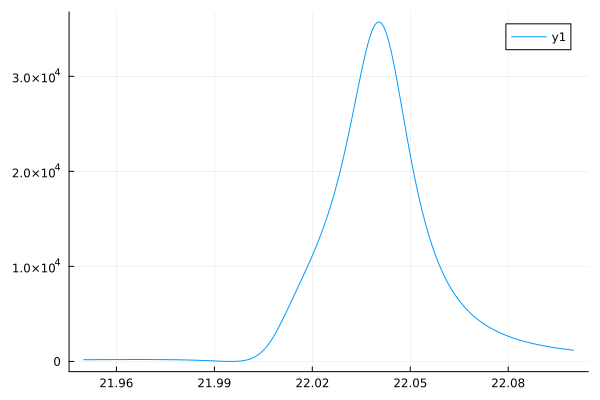

In [6]:
plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

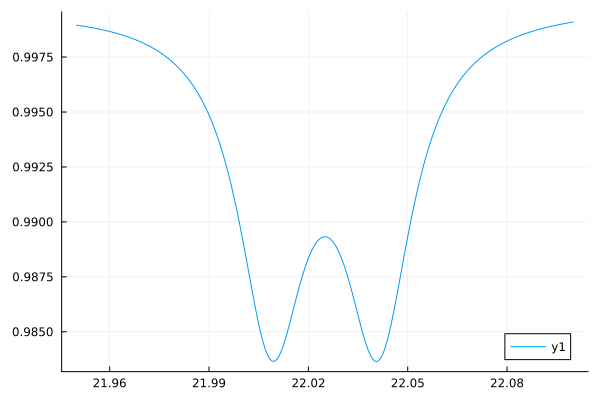

In [7]:
plot(freqsplot/1e9,abs.(getRef1d(booster,freqsplot)))

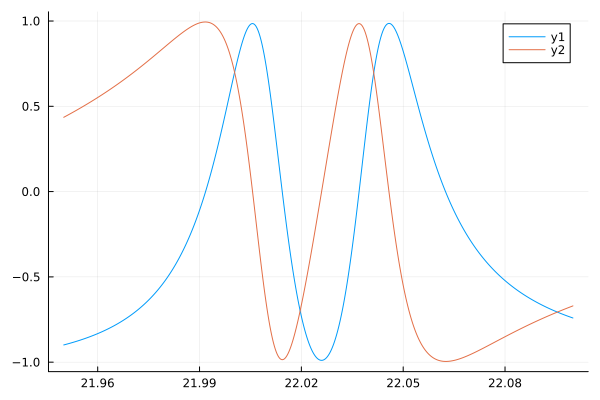

In [9]:
plot(freqsplot/1e9,real(getRef1d(booster,freqsplot)))
plot!(freqsplot/1e9,imag(getRef1d(booster,freqsplot)))

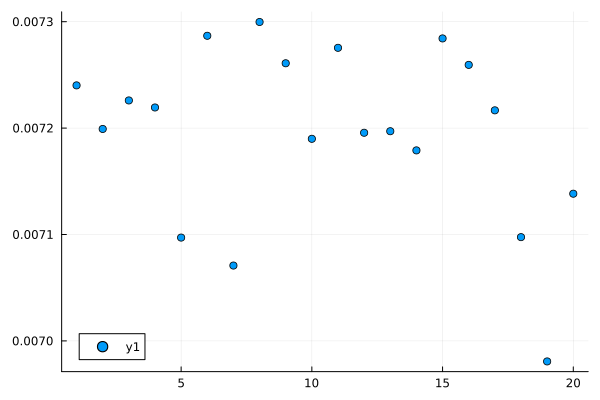

In [10]:
scatter(pos2dist(booster.pos))

In [ ]:
analyse(hist,trace,freqsplot; freqs=freqs,div=20,scale=1e9,ylim=[-0.05e4,3e4])